In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

titanic_data_train = pd.read_csv("titanic_train.csv")
titanic_data_test = pd.read_csv("titanic_test.csv")
titanic_data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print(f"Number of passengers in train data and test data: {len(titanic_data_train.index)}, {len(titanic_data_test.index)}")

Number of passengers in train data and test data: 891, 418


## **Analyzing Data**

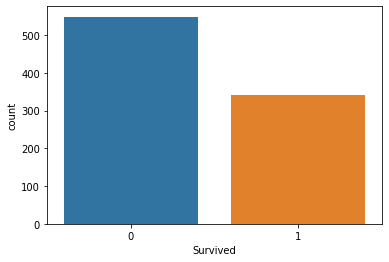

In [3]:
sns.countplot(x="Survived", data=titanic_data_train)

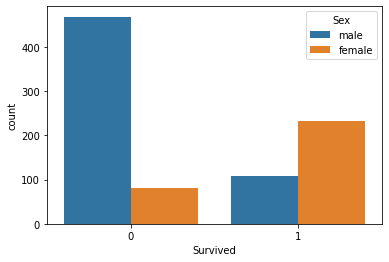

In [4]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data_train)

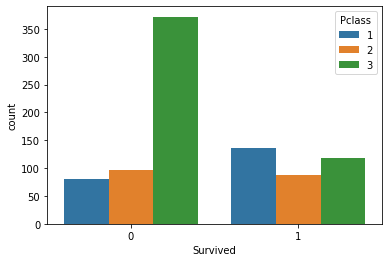

In [5]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data_train)

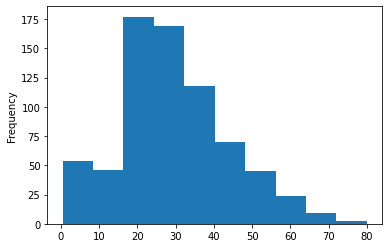

In [6]:
titanic_data_train["Age"].plot.hist()

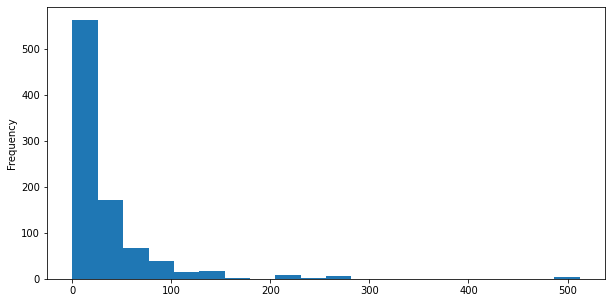

In [7]:
titanic_data_train["Fare"].plot.hist(bins=20, figsize=(10,5))

In [8]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


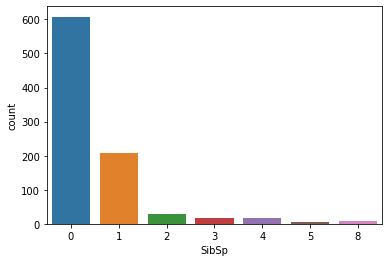

In [9]:
sns.countplot(x="SibSp", data=titanic_data_train)

## **Data Wrangling for both train and test data**

In [10]:
titanic_data_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
titanic_data_test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [12]:
titanic_data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

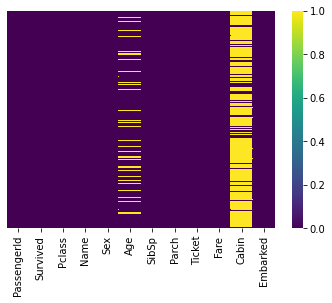

In [14]:
sns.heatmap(titanic_data_train.isnull(), yticklabels=False, cmap='viridis')

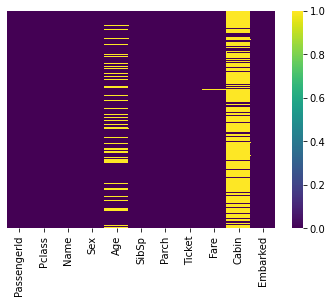

In [15]:
sns.heatmap(titanic_data_test.isnull(), yticklabels=False, cmap='viridis')

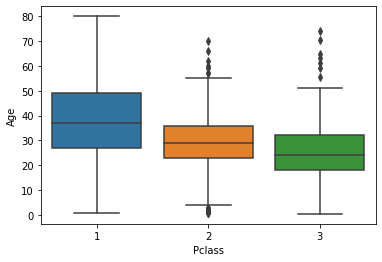

In [16]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data_train)

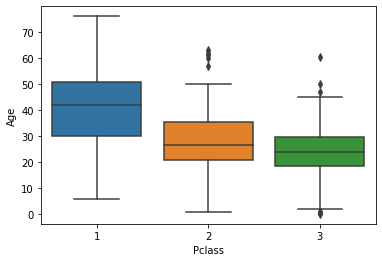

In [17]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data_test)

In [18]:
titanic_data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
titanic_data_train.drop("Cabin", axis=1, inplace=True)

In [21]:
titanic_data_test.drop("Cabin", axis=1, inplace=True)

In [22]:
titanic_data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
titanic_data_train.dropna(inplace=True)

In [25]:
titanic_data_test.dropna(inplace=True)

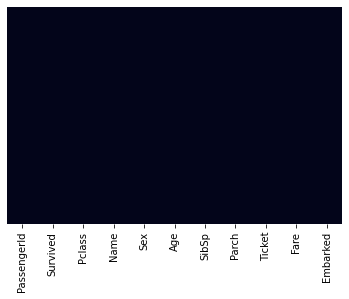

In [26]:
sns.heatmap(titanic_data_train.isnull(), yticklabels=False, cbar=False)

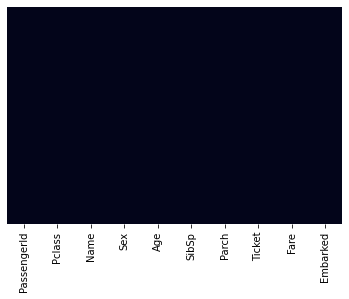

In [27]:
sns.heatmap(titanic_data_test.isnull(), yticklabels=False, cbar=False)

In [28]:
titanic_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
titanic_data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
titanic_data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [31]:
titanic_data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [32]:
sex_train = pd.get_dummies(titanic_data_train['Sex'], drop_first=True)
sex_train.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
sex_test = pd.get_dummies(titanic_data_test['Sex'], drop_first=True)
sex_test.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [34]:
embark_train = pd.get_dummies(titanic_data_train['Embarked'], drop_first=True)
embark_train.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
embark_test = pd.get_dummies(titanic_data_test['Embarked'], drop_first=True)
embark_test.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [36]:
Pcl_train = pd.get_dummies(titanic_data_train['Pclass'], drop_first=True)
Pcl_train.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [37]:
Pcl_test = pd.get_dummies(titanic_data_test['Pclass'], drop_first=True)
Pcl_test.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [38]:
titanic_data_train = pd.concat([titanic_data_train,sex_train,embark_train,Pcl_train], axis=1)

In [39]:
titanic_data_test = pd.concat([titanic_data_test,sex_test,embark_test,Pcl_test], axis=1)

In [40]:
titanic_data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [41]:
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [42]:
titanic_data_train.drop(['Sex', 'Embarked', 'PassengerId', 'Pclass', 'Name', 'Ticket'], axis=1, inplace=True)

In [43]:
titanic_data_test.drop(['Sex', 'Embarked', 'PassengerId', 'Pclass', 'Name', 'Ticket'], axis=1, inplace=True)

In [44]:
titanic_data_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [45]:
titanic_data_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


## **Train Data**

In [46]:
X_train=titanic_data_train.drop("Survived", axis=1)
y_train=titanic_data_train["Survived"]

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Prediction**

In [50]:
X_test=titanic_data_test.copy(deep=True)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
titanic_data_test['predictions'] = predictions

In [53]:
titanic_data_test.head(10)

,Age,SibSp,Parch,Fare,male,Q,S,2,3,predictions
0,34.5,0,0,7.8292,1,1,0,0,1,0
1,47.0,1,0,7.0000,0,0,1,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,1,1
5,14.0,0,0,9.2250,1,0,1,0,1,0
6,30.0,0,0,7.6292,0,1,0,0,1,1
7,26.0,1,1,29.0000,1,0,1,1,0,0
8,18.0,0,0,7.2292,0,0,0,0,1,1
9,21.0,2,0,24.1500,1,0,1,0,1,0


In [54]:
titanic_alive = titanic_data_test[titanic_data_test['predictions'] == 1]

In [55]:
display(titanic_alive)

,Age,SibSp,Parch,Fare,male,Q,S,2,3,predictions
4,22.0,1,1,12.2875,0,0,1,0,1,1
6,30.0,0,0,7.6292,0,1,0,0,1,1
8,18.0,0,0,7.2292,0,0,0,0,1,1
12,23.0,1,0,82.2667,0,0,1,0,0,1
14,47.0,1,0,61.1750,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
403,17.0,0,0,47.1000,1,0,1,0,0,1
409,3.0,1,1,13.7750,0,0,1,0,1,1
411,37.0,1,0,90.0000,0,1,0,0,0,1
412,28.0,0,0,7.7750,0,0,1,0,1,1


In [56]:
print(f"Number of passengers are alive: {len(titanic_alive.index)}")

Number of passengers are alive: 129
